In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import progressbar

In [2]:
df = pd.read_csv('five_means.csv')

In [3]:
sim_pca_data =  df[['Width','Depth','Rank']]

In [4]:
sim_pca_data

,Width,Depth,Rank
0,76.6,8.95,"[0, 1, 0, 0, 0]"
1,76.5,8.40,"[0, 1, 0, 0, 0]"
2,76.1,8.30,"[0, 1, 0, 0, 0]"
3,73.7,9.45,"[0, 1, 0, 0, 0]"
4,71.3,8.39,"[0, 0, 1, 0, 0]"
...,...,...,...
13564,61.3,12.90,"[0, 0, 1, 0, 0]"
13565,58.2,18.40,"[0, 1, 0, 0, 0]"
13566,82.0,18.40,"[1, 0, 0, 0, 0]"
13567,62.0,14.00,"[0, 1, 0, 0, 0]"


In [5]:
sim_pca_data['Rank'][0]

'[0, 1, 0, 0, 0]'

In [6]:
def convert_rank(data):
    
    #first re-convert all rank entries to a list
    for i in progressbar.progressbar(range(len(data['Rank']))):
        
        entry = data['Rank'][i]
        entry = entry.strip('][').split(', ')
        data['Rank'][i] = entry
    
    number_clusters = len(data['Rank'][0])
    
    new_ranks = []
    for i in progressbar.progressbar(range(len(data['Rank']))):
        for j in range(number_clusters):
            entry = data['Rank'][i]
            if entry[j] == '1':
                new_ranks.append(j)
            
    data['Rank'] = new_ranks
    return data
                

In [7]:
converted_data = convert_rank(sim_pca_data)

N/A% (0 of 13569) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--<ipython-input-6-90a2ce42989f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rank'][i] = entry
<ipython-input-7-5165c43a0f1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_data = convert_rank(sim_pca_data)
100% (13569 of 13569) |##################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (13569 of 13569) |##################| Elapsed Time: 0:00:00 Time:  0:00:00
<ipython-input-6-90a2ce42989f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [8]:
converted_data

,Width,Depth,Rank
0,76.6,8.95,1
1,76.5,8.40,1
2,76.1,8.30,1
3,73.7,9.45,1
4,71.3,8.39,2
...,...,...,...
13564,61.3,12.90,2
13565,58.2,18.40,1
13566,82.0,18.40,0
13567,62.0,14.00,1


In [9]:
def plot_data(data):
    plt.scatter(data.iloc[:,0],data.iloc[:,1],c=data['Rank'])
    plt.show()

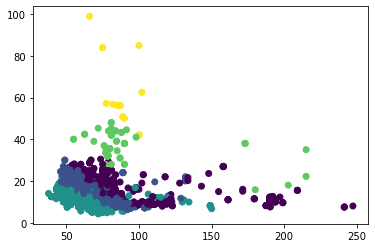

In [10]:
plot_data(converted_data)

In [11]:
def plot_random_subset_count(data, sample_size):
    
    new_data = []
    k = max(data['Rank']) + 1
    for i in range(k):
        subset = data[data['Rank'] == i]
        subset = subset.sample(n = sample_size)
        new_data.append(pd.DataFrame(subset))
        
    
    df = pd.DataFrame(new_data[0])
    for i in range(1,k):
        df = df.append(pd.DataFrame(new_data[i]))
        
    plt.scatter(df.iloc[:,0],df.iloc[:,1],c=df['Rank'])
    plt.show()
    

In [12]:
def plot_random_subset_percent(data, sample_percent):
    
    new_data = []
    k = max(data['Rank']) + 1
    for i in range(k):
        subset = data[data['Rank'] == i]
        subset = subset.sample(frac = sample_percent)
        new_data.append(pd.DataFrame(subset))
        
    
    df = pd.DataFrame(new_data[0])
    for i in range(1,k):
        df = df.append(pd.DataFrame(new_data[i]))
        
    plt.scatter(df.iloc[:,0],df.iloc[:,1],c=df['Rank'])
    plt.show()

In [13]:
Max_count = min(converted_data.Rank.value_counts())

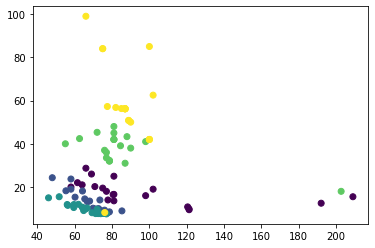

In [14]:
plot_random_subset_count(converted_data,20)

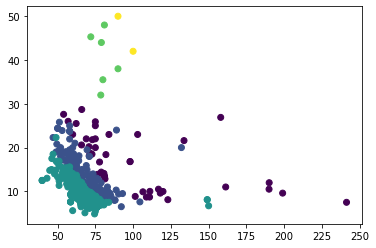

In [15]:
plot_random_subset_percent(converted_data,.1)

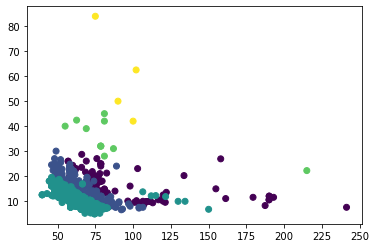

In [16]:
plot_random_subset_percent(converted_data,.2)